<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/ComputerVision/PA1_Super_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment #1: Super Resolution
- Computer Vision (2022 winter)
- 20195003 고강빈

In [199]:
# import libraries
import numpy as np
import cv2

# for colab
from google.colab.patches import cv2_imshow

In [200]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Method #1

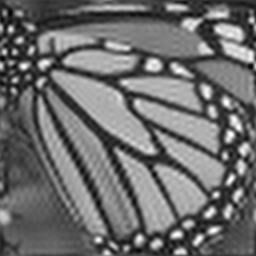

(256, 256)

In [201]:
# load upsampled image
img_high = cv2.imread('/content/drive/MyDrive/data/CompVision/upsampled.png')
img_high = cv2.cvtColor(img_high, cv2.COLOR_BGR2GRAY).astype(np.float32)
cv2_imshow(img_high)
img_high.shape

In [202]:
height, width = img_high.shape

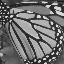

(64, 64)

In [203]:
# load ground truth image
img_gt = cv2.imread('/content/drive/MyDrive/data/CompVision/HR.png') # Ground Truth
img_gt = cv2.cvtColor(img_gt, cv2.COLOR_BGR2GRAY).astype(np.float32)
img_low = cv2.resize(img_gt, dsize=(height//4, width//4)) # Input of the algorithm (low resolution image)
# img_low = cv2.resize(img_low, dsize=(height, width))
cv2_imshow(img_low)
img_low.shape

In [204]:
# configuration
max_iter = 1_000
lr = 0.1

In [205]:
# Gradient Descent
for t in range(max_iter):
  img_dh = cv2.resize(img_high, dsize=(height//4, width//4))
  grad = np.subtract(img_dh, img_low)
  grad = cv2.resize(grad, dsize=(height,width))
  img_high = np.subtract(img_high, np.dot(lr, grad))
  loss = np.sum(np.square(np.subtract(img_low, cv2.resize(img_high, dsize=(height//4, width//4))))).mean()

  if t%100 == 0:
    print(f'loss at {t} iter: {loss}')

print(img_high.shape)
cv2.imwrite('/content/drive/MyDrive/data/CompVision/method1.png', img_high)

loss at 0 iter: 3168442.2408119217
loss at 100 iter: 2927065.357029754
loss at 200 iter: 2704364.2367966417
loss at 300 iter: 2498872.89765044
loss at 400 iter: 2309241.97452118
loss at 500 iter: 2134229.3289851914
loss at 600 iter: 1972691.4231889688
loss at 700 iter: 1823575.3955433785
loss at 800 iter: 1685911.7805104856
loss at 900 iter: 1558807.8195898947
(256, 256)


True

## Method #2

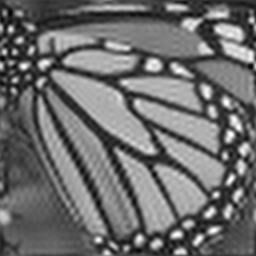

(256, 256)

In [206]:
# load upsampled image
img_high = cv2.imread('/content/drive/MyDrive/data/CompVision/upsampled.png')
img_high = cv2.cvtColor(img_high, cv2.COLOR_BGR2GRAY).astype(np.float32)
cv2_imshow(img_high)
img_high.shape

In [207]:
height, width = img_high.shape

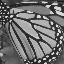

(64, 64)

In [208]:
# load ground truth image
img_gt = cv2.imread('/content/drive/MyDrive/data/CompVision/HR.png') # Ground Truth
img_gt = cv2.cvtColor(img_gt, cv2.COLOR_BGR2GRAY).astype(np.float32)
img_low = cv2.resize(img_gt, dsize=(height//4, width//4)) # Input of the algorithm (low resolution image)
# img_low = cv2.resize(img_low, dsize=(height, width))
cv2_imshow(img_low)
img_low.shape

In [209]:
# configuration
gamma = 6
beta = 0.001
max_iter = 1_000
lr = 0.1

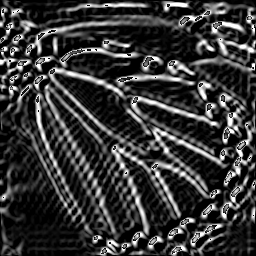

max: 0.011476211310456744
min: 1e-10


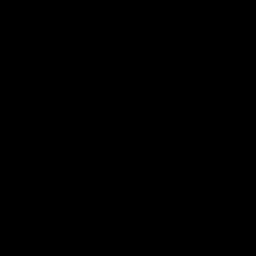

In [210]:
dx = (cv2.Sobel(img_high, -1, 1, 0))
dy = (cv2.Sobel(img_high, -1, 0, 1))

abs_dx = np.abs(dx)
abs_dy = np.abs(dy)
sobel = abs_dx + abs_dy
cv2_imshow(sobel)

norm = np.linalg.norm(sobel)
grad_dl = sobel/norm + 1e-10

print(f'max: {np.max(grad_dl)}\nmin: {np.min(grad_dl)}')

cv2_imshow(grad_dl)

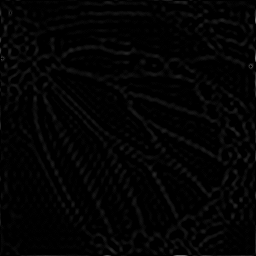

max: 0.06554171032015964
min: 0.0


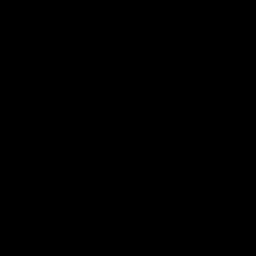

In [211]:
laplacian = cv2.Laplacian(img_high, -1)
cv2_imshow(laplacian)

norm = np.linalg.norm(laplacian)
grad_derivate = laplacian / norm

print(f'max: {np.max(grad_derivate)}\nmin: {np.min(grad_derivate)}')

cv2_imshow(grad_derivate)

[[1.00000000e-10 2.70028599e-04 1.26013310e-03 ... 1.00000000e-10
  1.00000000e-10 0.00000000e+00]
 [1.00000000e-10 1.00000000e-10 1.42424000e-05 ... 4.50048498e-05
  1.00000000e-10 0.00000000e+00]
 [1.00000000e-10 0.00000000e+00 0.00000000e+00 ... 3.15033349e-04
  1.00000000e-10 0.00000000e+00]
 ...
 [0.00000000e+00 1.21398942e-03 3.24034209e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.34024709e-03 2.25023759e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.44015210e-03 1.53016159e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
max: 0.011476211310456744
min: 0.0


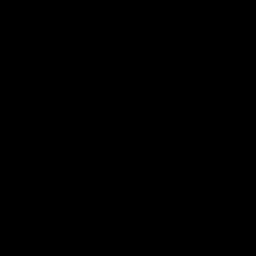

In [212]:
edge = grad_dl - grad_derivate
edge = np.clip(edge, a_min=0.0, a_max=1.0)
print(edge)
print(f'max: {np.max(edge)}\nmin: {np.min(edge)}')
cv2_imshow(edge)

In [213]:
laplacian_grad = gamma * laplacian * (edge/grad_dl)
laplacian_grad

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.15190289, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 7.58663283, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [214]:
# Gradient Descent
for t in range(max_iter):
  laplacian = cv2.Laplacian(img_high, -1)
  img_dh = cv2.resize(img_high, dsize=(height//4, width//4))
  grad = np.subtract(img_dh, img_low) 
  grad = cv2.resize(grad, dsize=(height,width)) - beta*(laplacian-laplacian_grad)
  img_high = np.subtract(img_high, np.dot(lr, grad))
  loss = np.sum(np.square(np.subtract(img_low, cv2.resize(img_high, dsize=(height//4, width//4))))).mean()

  if t%100 == 0:
    print(f'loss at {t} iter: {loss}')

print(img_high.shape)
cv2.imwrite('/content/drive/MyDrive/data/CompVision/method2.png', img_high)

loss at 0 iter: 3168442.0421641315
loss at 100 iter: 2927045.8838445917
loss at 200 iter: 2704333.1032743263
loss at 300 iter: 2498836.545980644
loss at 400 iter: 2309205.812292706
loss at 500 iter: 2134197.852359785
loss at 600 iter: 1972668.327220046
loss at 700 iter: 1823563.672891511
loss at 800 iter: 1685913.809690323
loss at 900 iter: 1558825.443776753
(256, 256)


True

## Evaluate

In [215]:
# Metrics: MSE & PSNR
upsampled = cv2.imread('/content/drive/MyDrive/data/CompVision/upsampled.png')

method1 = cv2.imread('/content/drive/MyDrive/data/CompVision/method1.png')
method2 = cv2.imread('/content/drive/MyDrive/data/CompVision/method2.png')

# MSE
def mse(result):
  result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
  mse = np.sum(np.square(np.subtract(img_gt, result))/(height*width)).mean()
  return mse

# PSNR
def psnr(result):
  psnr = np.sum(10*np.log10((255*255)/mse(result))).mean()
  return psnr

In [216]:
print(psnr(upsampled))
print(psnr(method1))
print(psnr(method2))

29.58670990229942
29.900666304467588
29.900538809147058
